# Using Pyndamics to Simulate Dynamical Systems

Pyndamics provides a way to describe a dynamical system in terms of the differential equations, or the stock-flow formalism. It is a wrapper around the Scipy odeint function, with further functionality for time plots, phase plots, and vector fields.

Page for this package: [https://code.google.com/p/pyndamics/](https://code.google.com/p/pyndamics/)

In [1]:
%matplotlib notebook

import sys
sys.path.append('/Users/nmurray/programming/python/pyndamics')

from pyndamics import Simulation

import matplotlib.pyplot as plt
plt.figure
plt.plot

import pylab
plt.xlabel

<function matplotlib.pyplot.xlabel>

## Population of Mice - Exponential Growth

### Specifying the Differential Equation

<IPython.core.display.Javascript object>


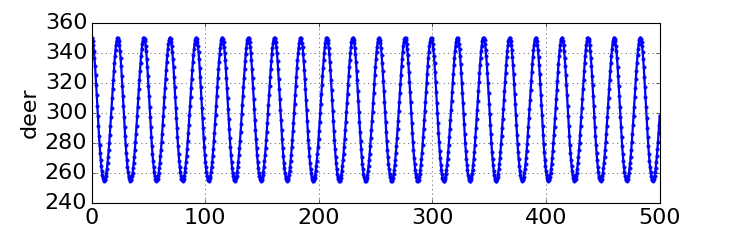

In [2]:
sim=Simulation()   # get a simulation object

sim.add("mice'=b*mice - d*mice",    # the equations
    100,                            # initial value
    plot=True)                      # display a plot

sim.params(b=1.1,d=0.08)

sim.run(0,5)

### Specifying the Inflows/Outflows

In [4]:
sim=Simulation()   # get a simulation object

sim.stock("mice",100,plot=False)
sim.inflow("mice","b*mice")
sim.outflow("mice","d*mice")

sim.params(b=1.1,d=0.08)

sim.run(0,4)

### Plotting Manually

In [7]:
x,y=sim.t,sim.mice
plt.plot(x,y,'r--')
plt.xlabel('Days')
plt.ylabel('Number of Mice')

## Predator-Prey Dynamics

deer'=r*deer*(1-deer/K)-c*deer*wolf
wolf'=-Wd*wolf+D*deer*wolf
r=0.25
D=0.001
K=inf
c=0.005
Wd=0.3



<IPython.core.display.Javascript object>


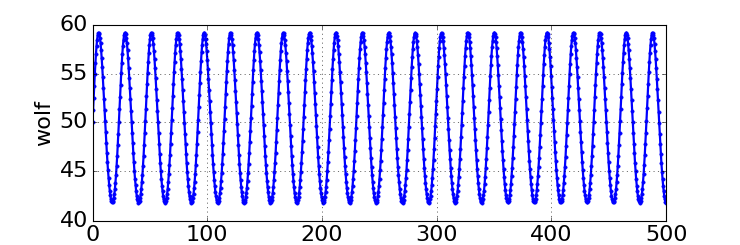

In [8]:
sim=Simulation()

sim.add("deer' = r*deer*(1-deer/K)-c*deer*wolf",
                initial_value=350,
                plot=True)

sim.add("wolf' = -Wd*wolf+D*deer*wolf",
                initial_value=50,
                plot=True)

sim.params(r=0.25,D=0.001,c=0.005,Wd=0.3,K=1e500)

print sim.equations()
sim.run(0,500)

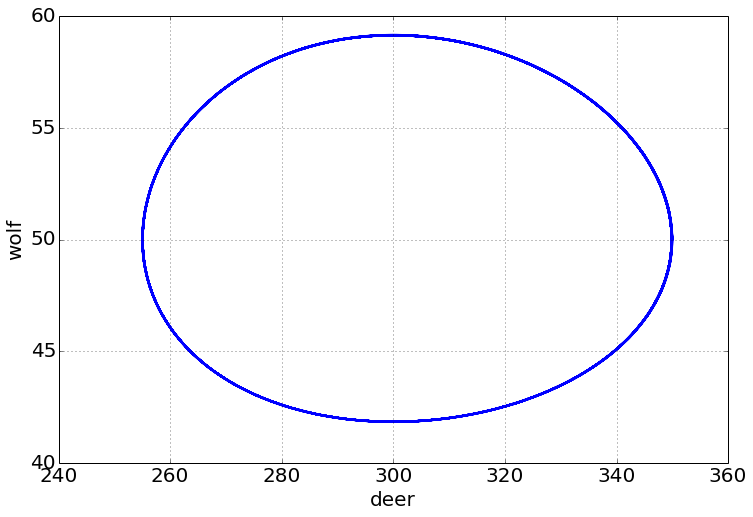

In [6]:
from pyndamics import phase_plot
phase_plot(sim,'deer','wolf')

## Exponential vs Logistic

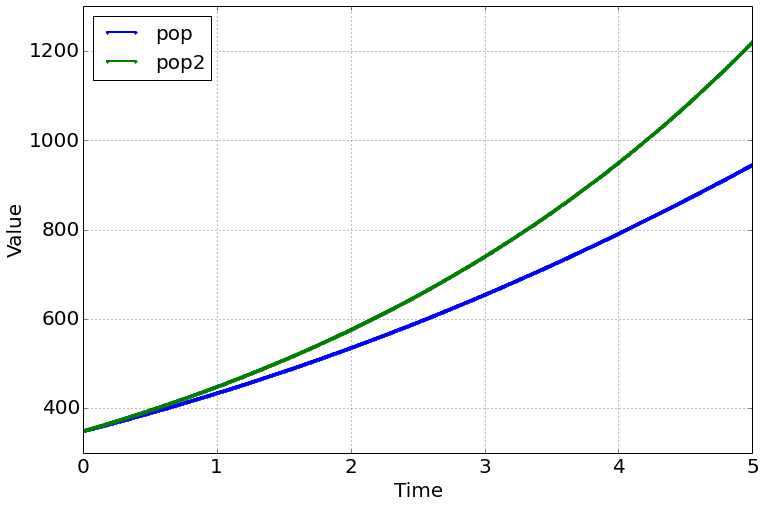

In [7]:
sim=Simulation()

# logistic growth
sim.add("pop' = r*pop*(1-pop/K)",
                initial_value=350,
                plot=1)

# exponential growth
sim.add("pop2' = r*pop2",
                initial_value=350,
                plot=1)


sim.params(r=0.25,K=3000)

sim.run(0,5)


## Damped Spring - Second-order Differential Equations

When specifying the initial conditions for a 2nd-order equation, you need to specify the value of the variable (e.g. position) and its first derivative (e.g. velocity).  The simulator automatically changes the equations into a set of 1st-order equations.

x'=x_p_
x_p_'=-k*x/m -b*x_p_
m=1.0
b=0.5
k=1.0



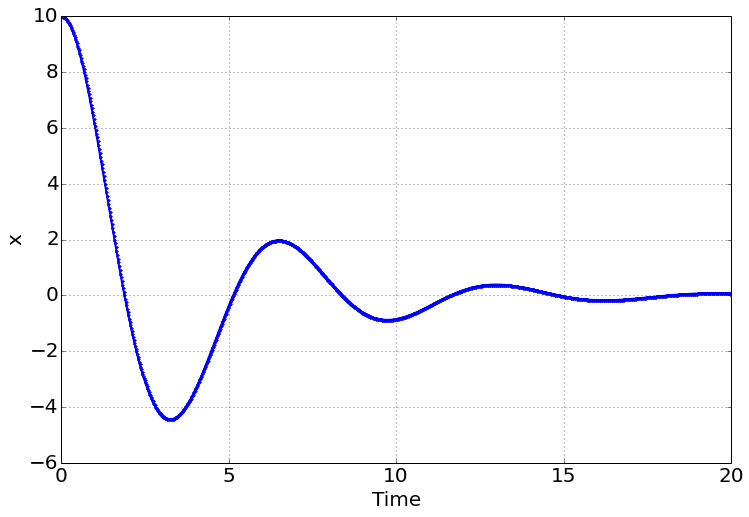

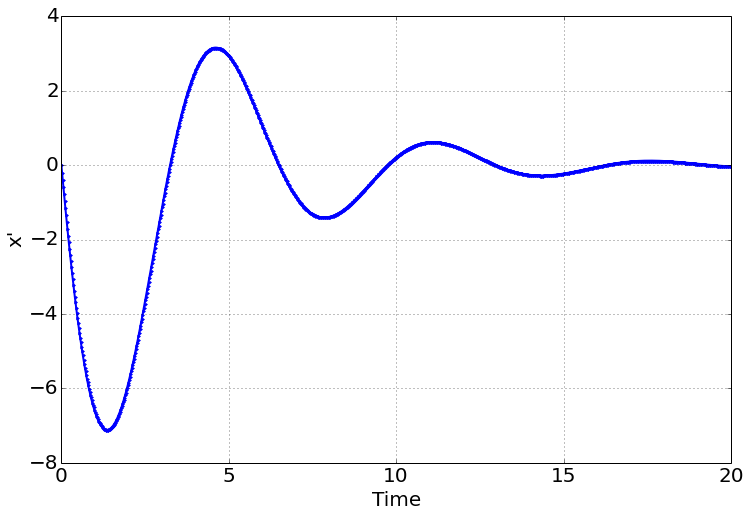

In [8]:
sim=Simulation()
sim.add("x''=-k*x/m -b*x'",[10,0],plot=True)
sim.params(k=1.0,m=1.0,b=0.5)
print sim.equations()
sim.run(0,20)

## Vector Field Example

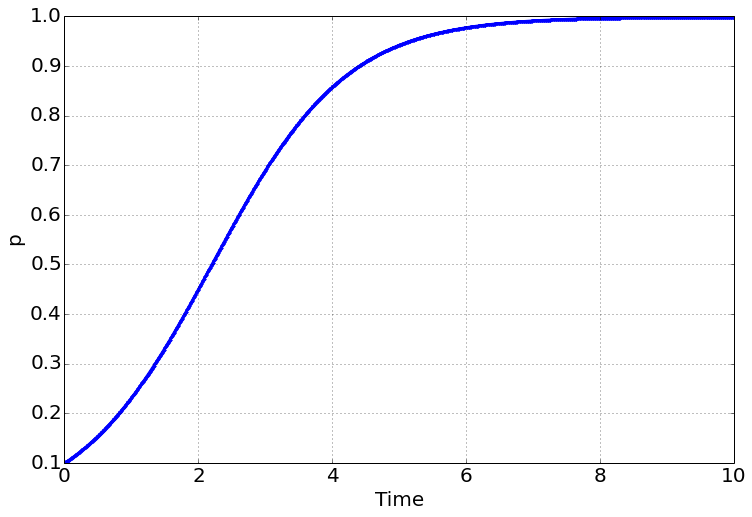

In [9]:
sim=Simulation()
sim.add("p'=p*(1-p)",0.1,plot=True)
sim.run(0,10)

Arrows scaled by the magnitude...

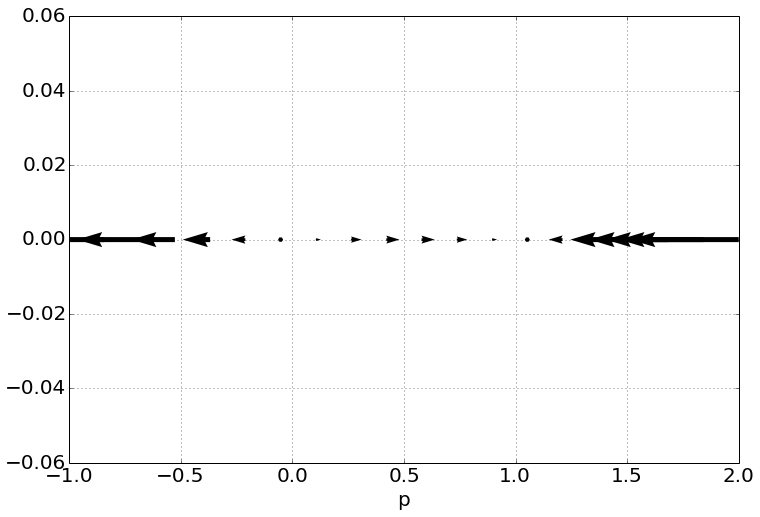

In [10]:
from pyndamics import vector_field
vector_field(sim,p=linspace(-1,2,20))

Arrows rescaled to constant value...

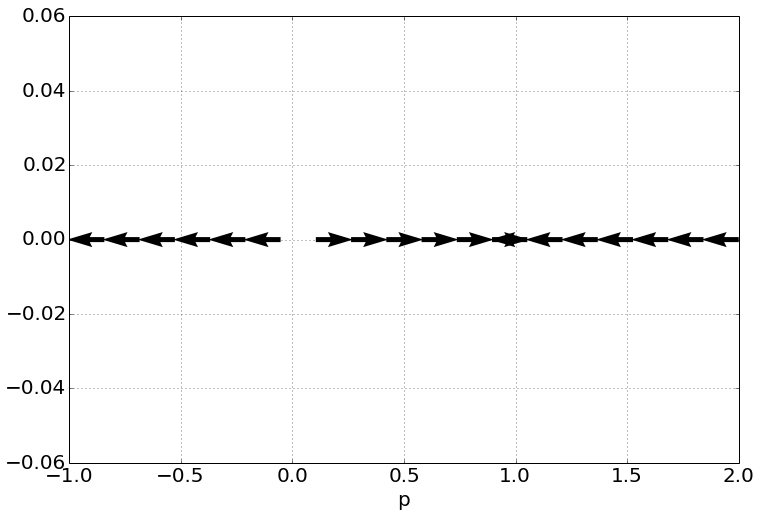

In [11]:
vector_field(sim,rescale=True,p=linspace(-1,2,20))

## The Lorenz System

[http://en.wikipedia.org/wiki/Lorenz_system](http://en.wikipedia.org/wiki/Lorenz_system)


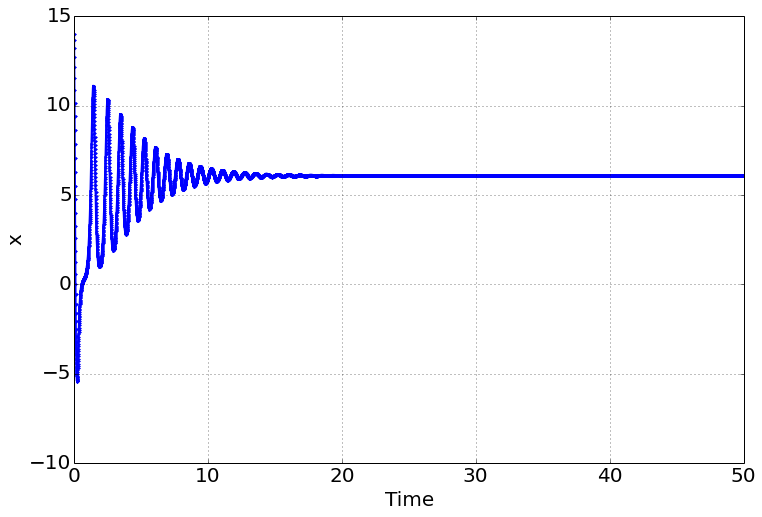

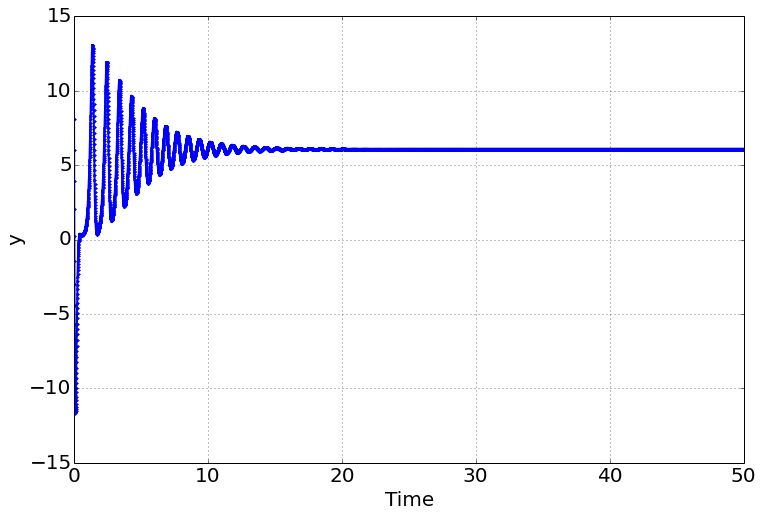

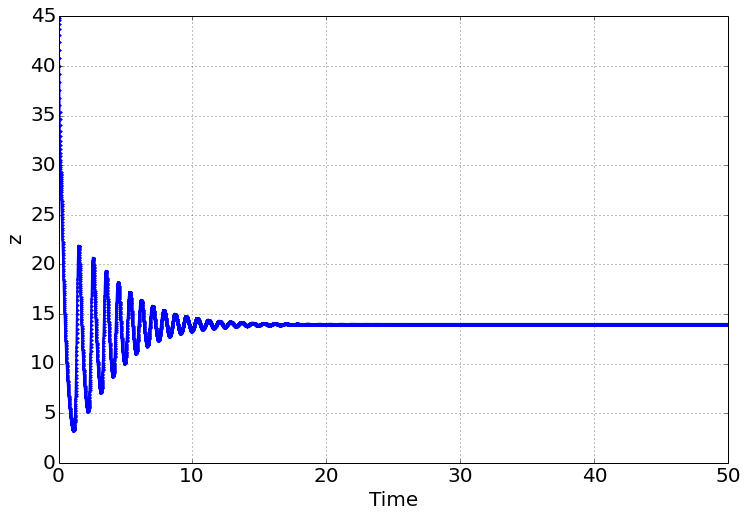

In [12]:
sim=Simulation()
sim.add("x'=sigma*(y-x)",14,plot=True)
sim.add("y'=x*(rho-z)-y",8.1,plot=True)
sim.add("z'=x*y-beta*z",45,plot=True)
sim.params(sigma=10,beta=8.0/3,rho=15)
sim.run(0,50,num_iterations=10000)  # increase the resolution

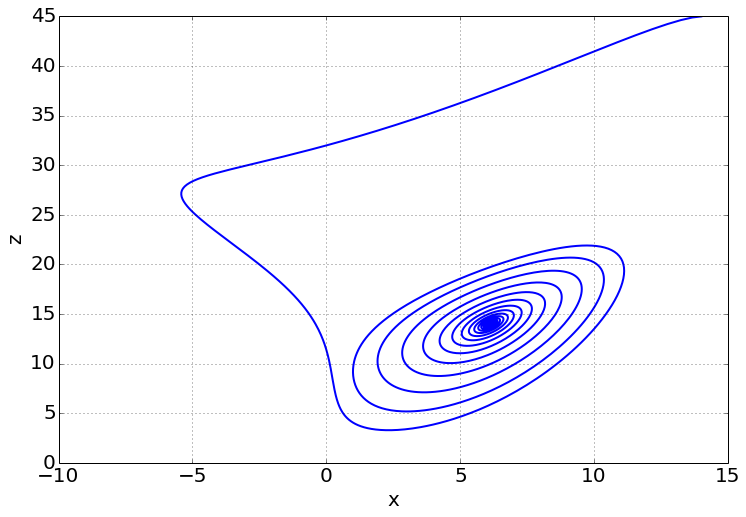

In [13]:
phase_plot(sim,'x','z')

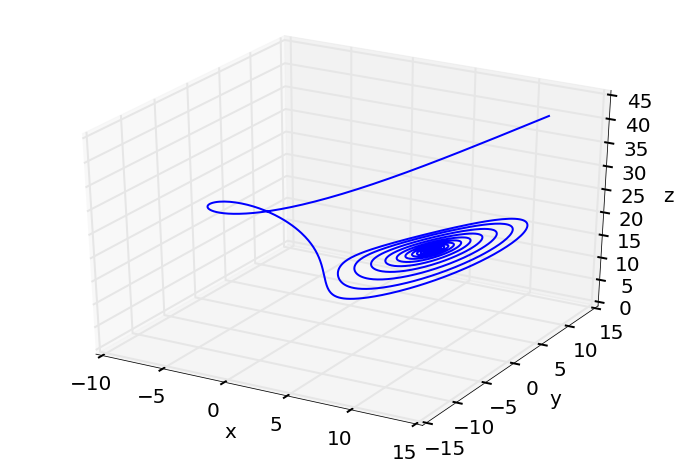

In [14]:
phase_plot(sim,'x','y','z')